# Exploring Relations between SNAP benefits and Health Insurance

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 

# SNAP State Rates

In [2]:
#!wget https://raw.githubusercontent.com/michaelbbryan/tools-and-kaggles/main/DataDive2022/snapmergecounty.csv

In [3]:
snap_county = pd.read_csv("snapmergecounty.csv")

In [4]:
snap_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183005 entries, 0 to 183004
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Substate                       183005 non-null  object 
 1   PersonsPublic                  183005 non-null  float64
 2   PersonsNonPublic               183005 non-null  float64
 3   PersonsTotal                   183005 non-null  float64
 4   HouseholdsPublicAssistance     183005 non-null  float64
 5   HouseholdsNonPublicAssistance  183005 non-null  float64
 6   HouseholdsTotal                183005 non-null  float64
 7   Issuance                       183005 non-null  float64
 8   month                          183005 non-null  object 
 9   year                           183005 non-null  int64  
 10  countyFIPS                     183005 non-null  int64  
 11  countyNAME                     183005 non-null  object 
 12  stateFIPS                     

## ACS Tables

In [5]:
acs_merge = pd.read_csv("acsmerge.csv", dtype="str")#, low_memory=False, dtype={"dfq":"str"})

In [6]:
acs_meta = pd.read_csv("acsmetadata.csv")

In [7]:
acs_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2842 entries, 0 to 2841
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         2842 non-null   object
 1   Column Name        1979 non-null   object
 2   Label              1979 non-null   object
 3   Table Name         1979 non-null   object
 4   Table Description  1979 non-null   object
dtypes: object(5)
memory usage: 111.1+ KB


In [8]:
# Get FIPS reference data
fipsstate = pd.read_fwf('https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt',
                        skiprows=16, skipfooter=3198, dtype=str,
                        names=['stateFIPS','stateNAME'], colspecs = [(7, 9), (17, 30)])
fipscounty = pd.read_fwf('https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt',
                        skiprows=72, dtype=str,
                        names=['countyFIPS','countyNAME'], colspecs = [(4, 9), (17, 80)])
fipscounty['stateFIPS'] = fipscounty.countyFIPS.str[:2]
fips = pd.merge(fipscounty,fipsstate,on='stateFIPS',how='left')

In [9]:
#acs_merge["countyFIPS"] = acs_merge["countyFIPS"].astype(str)
len(acs_merge.columns)

2876

In [10]:
# Add state info
acs_state = pd.merge(acs_merge, fips, on="countyFIPS", how="left")

In [11]:
acs_state["stateNAME"] = acs_state["stateNAME"].str.title()

## Exploring relationships

In [12]:
BDT_states = ["Colorado", "Maryland", "Michigan", "New York", "North Carolina", "Pennsylvania",  "Carolina"] 
additional_states = ["Florida", "Mississippi", "Texas", "Alabama", "Tennessee", "Louisiana", "Oklahoma"]

def BDT_identifier(w):
    if w in BDT_states:
        return 1
    elif w in additional_states:
        return 2
    else:
        return 0  

acs_state["BDT_states"] = acs_state["stateNAME"].apply(BDT_identifier)


### All population

In [13]:
acs_state["S2701_C03_058E"] = acs_state["S2701_C03_058E"].astype("float")
acs_state["S2201_C04_001E"] = acs_state["S2201_C04_001E"].astype("float")
acs_state["S2701_C03_001E"] = acs_state["S2701_C03_001E"].astype("float")

Text(0, 0.5, 'Health insurance (% population)')

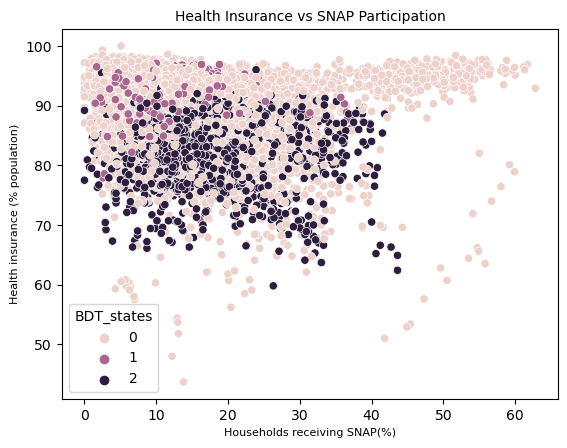

In [14]:
sns.scatterplot(data=acs_state, x="S2201_C04_001E", 
                y="S2701_C03_001E",hue="BDT_states")
plt.title("Health Insurance vs SNAP Participation", fontsize=10)
plt.xlabel("Households receiving SNAP(%)", fontsize=8)
plt.ylabel("Health insurance (% population)", fontsize=8)

### Population below the 138% poverty threshold

Text(0, 0.5, 'Health Insurance (% population below 138% of poverty threshold)')

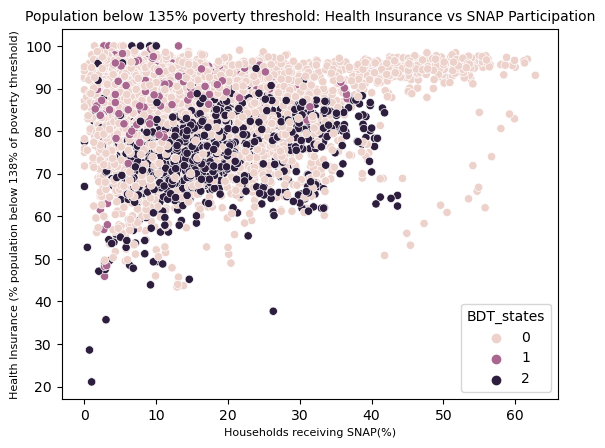

In [15]:
sns.scatterplot(data=acs_state, x="S2201_C04_001E", 
                y="S2701_C03_058E",hue="BDT_states")
plt.title("Population below 135% poverty threshold: Health Insurance vs SNAP Participation", fontsize=10)
plt.xlabel("Households receiving SNAP(%)", fontsize=8)
plt.ylabel("Health Insurance (% population below 138% of poverty threshold)", fontsize=8)

### Public health

In [16]:
acs_state["S2704_C03_026E"] = acs_state["S2704_C03_026E"].astype("float")

Text(0, 0.5, 'Public health insurance alone (% population)')

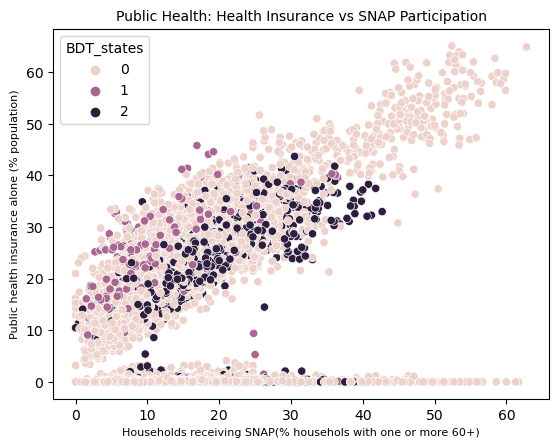

In [17]:
sns.scatterplot(data=acs_state, x="S2201_C04_001E", 
                y="S2704_C03_026E",hue="BDT_states")
plt.title("Public Health: Health Insurance vs SNAP Participation", fontsize=10)
plt.xlabel("Households receiving SNAP(% househols with one or more 60+)", fontsize=8)
plt.ylabel("Public health insurance alone (% population)", fontsize=8)